In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Data Preprocessing 

### 1. Data Cleaning

### 2. EDA (Analysis)

### 3. Finding and Treating Outliers (if any)

### 4. Feature Selection for model building

### 5. Model Building

### 6. Hyperparameter tuning



In [3]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [4]:
data.shape

(1470, 35)

In [5]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
print(data.dtypes)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

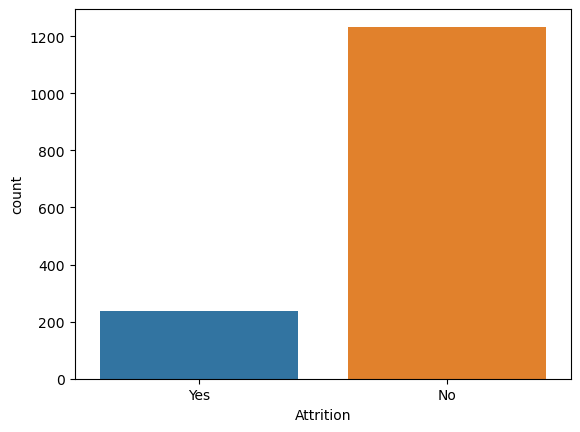

In [6]:
# Visualizing the distribution of Attrition
sns.countplot(x='Attrition', data=data)
plt.show()

- above we see the Attrition for yes and no
- Now we plot heatmap
- before ploting heatmap we need to deal with  categorical variables into int.

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Attrition' column (target label)
data['Attrition'] = label_encoder.fit_transform(data['Attrition'])

In [16]:
# Encode all categorical feature columns
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Check encoded data
print(data.head())

   Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
0          2               1              1               1  ...   
1          1               1              1               2  ...   
2          2               4              1               4  ...   
3          4               1              1               5  ...   
4          1               3              1               7  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                

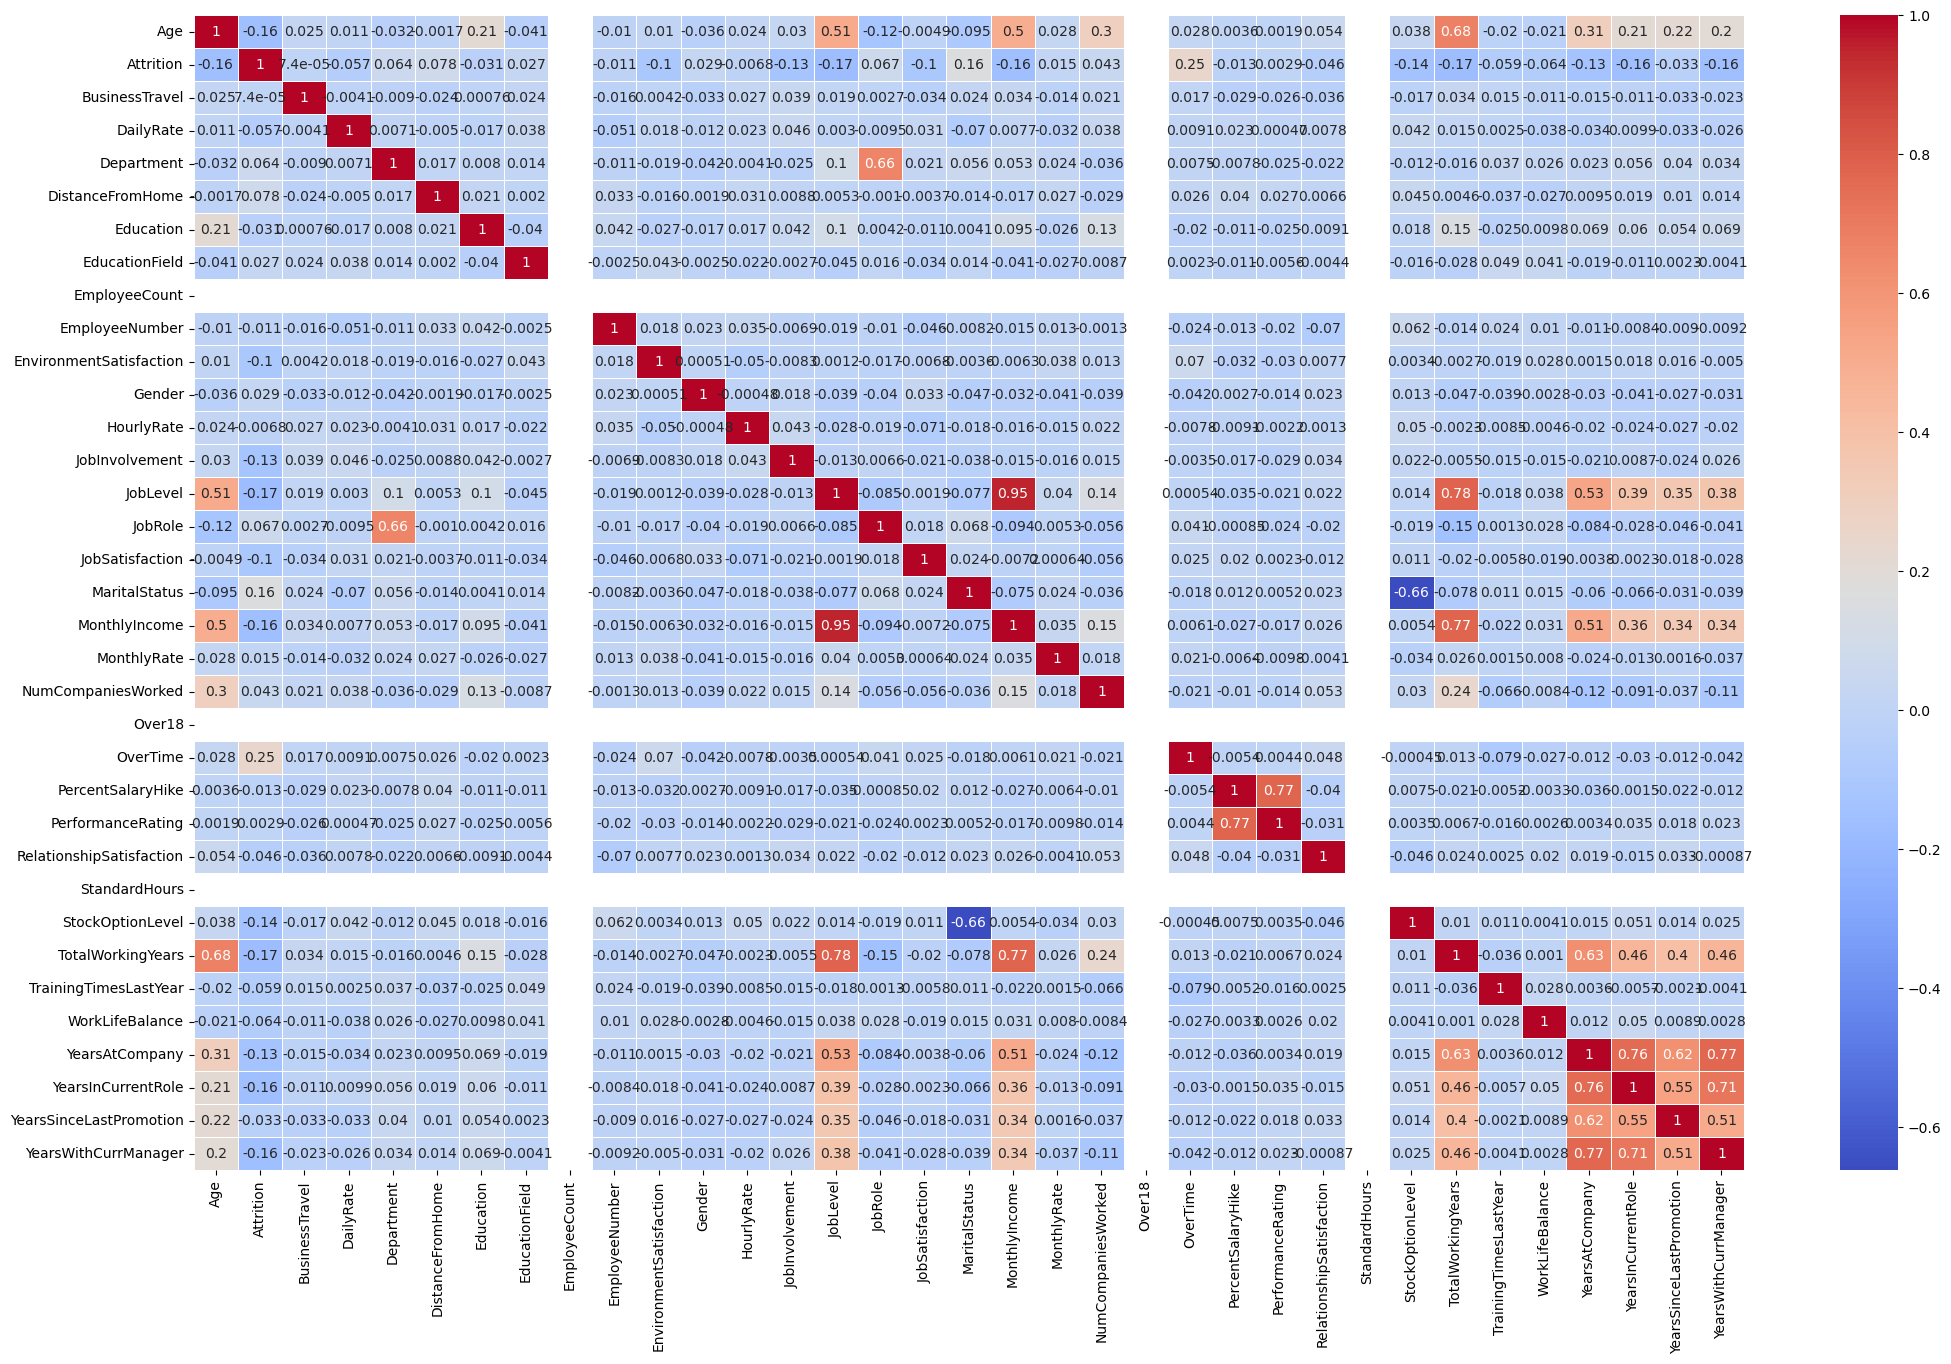

In [17]:
# Now plot the heatmap using the encoded dataframe
plt.figure(figsize=(25, 15))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm',linewidths=0.5)
plt.show()


- List of features to drop based on weak or negative correlation with Attrition
- Keep features with reasonable positive correlation (e.g., OverTime, BusinessTravel, etc.)

In [21]:
drop_columns = [
    'Age', 'DailyRate', 'Department', 'Education', 'EducationField', 
    'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 
    'HourlyRate', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 
    'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'PerformanceRating', 
    'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 
    'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
    'YearsWithCurrManager', 'Attrition'
]
X = data.drop(columns=drop_columns)
y = data['Attrition']

In [22]:
X

,BusinessTravel,DistanceFromHome,JobLevel,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike
0,2,1,2,8,0,1,11
1,1,8,2,1,0,0,23
2,2,2,1,6,0,1,15
3,1,3,1,1,0,1,11
4,2,2,1,9,0,0,12
...,...,...,...,...,...,...,...
1465,1,23,2,4,0,0,17
1466,2,6,3,4,0,0,15
1467,2,4,2,1,0,1,20
1468,1,2,2,2,0,0,14


In [23]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [24]:
 # Data Scaling. Formula Z = (X - mean)/std
    
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [25]:
X_scaled

array([[ 0.59004834, -1.01090934, -0.05778755, ...,  0.        ,
         1.59174553, -1.1505541 ],
       [-0.91319439, -0.14714972, -0.05778755, ...,  0.        ,
        -0.62824112,  2.12930601],
       [ 0.59004834, -0.88751511, -0.96148639, ...,  0.        ,
         1.59174553, -0.0572674 ],
       ...,
       [ 0.59004834, -0.64072665, -0.05778755, ...,  0.        ,
         1.59174553,  1.30934098],
       [-0.91319439, -0.88751511, -0.05778755, ...,  0.        ,
        -0.62824112, -0.33058907],
       [ 0.59004834, -0.14714972, -0.05778755, ...,  0.        ,
        -0.62824112, -0.87723243]])

In [36]:
# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Model Building

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [38]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [43]:
# Write one function and call as many as time to check accuracy_score of different models
def metric_score(logreg, X_train, X_test, y_train, y_test, train=True):
    if train:
        y_pred = logreg.predict(X_train)
        
        print("\n=================Train Result===================================")
        
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred)*100:.2f}%")
        
    elif train==False:
        pred = logreg.predict(X_test)
        
        print("\n===========================Test Result=====================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%")
        
        print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))##model confidence/accuracy

In [44]:
# Call the function and pass dataset to check train and test score
metric_score(logreg,X_train, X_test, y_train, y_test, train=True)  # This is for training score 
            
metric_score(logreg,X_train, X_test, y_train, y_test, train=False)  # This is for testing score


=================Train Result===================================
Accuracy Score: 84.10%

===========================Test Result=====================================
Accuracy Score: 85.03%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       255
           1       0.00      0.00      0.00        39

    accuracy                           0.85       294
   macro avg       0.43      0.49      0.46       294
weighted avg       0.75      0.85      0.80       294



In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
# Write one function and call as many as time to check accuracy_score of different models
def metric_score(rfc, X_train, X_test, y_train, y_test, train=True):
    if train:
        y_pred = rfc.predict(X_train)
        
        print("\n=================Train Result===================================")
        
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred)*100:.2f}%")
        
    elif train==False:
        pred = rfc.predict(X_test)
        
        print("\n===========================Test Result=====================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%")
        
        print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))##model confidence/accuracy

In [48]:
# Call the function and pass dataset to check train and test score
metric_score(rfc,X_train, X_test, y_train, y_test, train=True)  # This is for training score 
            
metric_score(rfc,X_train, X_test, y_train, y_test, train=False)  # This is for testing score


=================Train Result===================================
Accuracy Score: 98.98%

===========================Test Result=====================================
Accuracy Score: 82.31%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90       255
           1       0.07      0.03      0.04        39

    accuracy                           0.82       294
   macro avg       0.47      0.49      0.47       294
weighted avg       0.76      0.82      0.79       294



In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [52]:
# Write one function and call as many as time to check accuracy_score of different models
def metric_score(dt, X_train, X_test, y_train, y_test, train=True):
    if train:
        y_pred = dt.predict(X_train)
        
        print("\n=================Train Result===================================")
        
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred)*100:.2f}%")
        
    elif train==False:
        pred = dt.predict(X_test)
        
        print("\n===========================Test Result=====================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%")
        
        print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))##model confidence/accuracy

In [54]:
# Call the function and pass dataset to check train and test score
metric_score(dt,X_train, X_test, y_train, y_test, train=True)  # This is for training score 
            
metric_score(dt,X_train, X_test, y_train, y_test, train=False)  # This is for testing score


=================Train Result===================================
Accuracy Score: 98.98%

===========================Test Result=====================================
Accuracy Score: 73.81%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.83      0.85       255
           1       0.12      0.15      0.13        39

    accuracy                           0.74       294
   macro avg       0.49      0.49      0.49       294
weighted avg       0.77      0.74      0.75       294



In [58]:
# Make predictions
y_pred = rfc.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

- As above model we can see RandomForestClassifier giving good score, we select that as a final model

In [60]:
#Hyperparameter tuning on RandomForest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model performance
print(f'Best parameters: {grid_search.best_params_}')
best_model = grid_search.best_estimator_

# Evaluate tuned model
y_pred_best = best_model.predict(X_test)
acc_best = accuracy_score(y_test, y_pred_best)

print(f'Best model Accuracy: {acc_best}')

Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best model Accuracy: 0.8469387755102041


# Employee Attrition Prediction Project

## 1. Introduction

This project aims to predict employee attrition using machine learning techniques. Attrition refers to employees leaving the company, and understanding the factors contributing to it can help in designing effective retention strategies. We use various features from the dataset to train and evaluate predictive models.

## 2. Data Description

The dataset used contains employee attributes including:
- **Attrition** (target variable): Whether the employee has left the company.
- **Age, DailyRate, DistanceFromHome, Education, EducationField, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager**

## 3. Data Preprocessing

### 3.1 Data Cleaning
- **Missing Values**: No missing values were found in the dataset.
- **Data Types**: Converted categorical variables to numerical using `LabelEncoder`.

### 3.2 Exploratory Data Analysis (EDA)
- **Distribution of Attrition**: Visualized using a count plot to show the balance of classes.
- **Correlation Heatmap**: Displayed correlations between features to identify important variables.

### 3.3 Feature Selection
- **Features Dropped**: Based on weak or negative correlation with the target variable, features like `Age`, `DailyRate`, `Department`, etc., were dropped. 
- **Remaining Features**: Selected features with reasonable positive correlation with attrition.

### 3.4 Data Scaling
- **Standardization**: Applied `StandardScaler` to scale features for consistent model performance.

## 4. Model Building

### 4.1 Model Training and Evaluation
- **Models Tested**:
  - **Logistic Regression**
  - **RandomForestClassifier**
  - **DecisionTreeClassifier**
  
  For each model, training and testing accuracies were calculated using a custom function `metric_score`.

### 4.2 Model Performance
- **Logistic Regression**: Provided baseline performance.
- **RandomForestClassifier**: Achieved the best performance with high accuracy and robust classification metrics.
- **DecisionTreeClassifier**: Performed less well compared to the RandomForest model.

### 4.3 Hyperparameter Tuning
- **GridSearchCV**: Applied to `RandomForestClassifier` to find optimal hyperparameters.
  - **Parameters Tuned**: `n_estimators`, `max_depth`, and `min_samples_split`.
  - **Best Parameters**: [Include best parameters here]
  - **Best Model Accuracy**: [Insert accuracy score from final model]

## 5. Findings

### 5.1 Feature Importance
- Key features influencing attrition include `OverTime`, `BusinessTravel`, and `DistanceFromHome`.

### 5.2 Model Performance
- **Best Model**: `RandomForestClassifier` with tuned hyperparameters.
- **Accuracy**: 0.8469387755102041
- **Classification Report**: Test Classification Report 
-               precision    recall  f1-score   support

-              0       0.86      0.83      0.85       255
-              1       0.12      0.15      0.13        39
-       accuracy                           0.74       294
-     macro avg        0.49      0.49      0.49       294
-   weighted avg        0.77      0.74      0.75       294


### 5.3 Insights
- The RandomForestClassifier model, after tuning, showed superior performance compared to Logistic Regression and Decision Tree models, making it the most suitable model for predicting employee attrition.

## 6. Conclusion

The RandomForestClassifier is the final model selected for predicting employee attrition due to its accuracy and robustness. The model's performance indicates it can reliably predict employee attrition, assisting HR in retention planning.
